# Приоритизация гипотез, анализ результатов А/В-теста по крупному интернет-магазину

**Описание проекта:** 
    
Необходимо проанализировать крупный интернет-магазин в части приоритизации гипотез увеличения выручки, а также проанализировать результаты А/В-теста на предмет наличия/отсутствия статистической значимости различий в выручке и среднему чеку по двум группам.

**Цели проекта:**
    
1) Определить, как изменилась приоритизация гипотез при применении разных методов приоритизации (ICE и RICE).
 
 2) Проанализировать А/В-тест по двум сегментам и принять решение по результатам теста об успешности/неуспешности теста, либо о необходимости его продолжения. 

**Задачи проекта:**

   1) По приоритизации гипотез:
   
        - изучить полученные данные и рассчитать показатели ICE и RICE;
        - установить, какие различия при применении разных методов приоритизации.
   2) По анализу А/В-теста:
   
        - изучить полученные данные, осуществить предподготовку данных перед анализом;
        - построить графики для анализа и рассчитать показатели стат.значимости;
        - проанализировать результаты теста и сделать выводы по ним.
        



**План (декомпозиция) анализа данных:**
    
   1. Приоритизация гипотез:
   
        - Применить фреймворк ICE для приоритизации гипотез;
        - применить фреймворк RICE для приоритизации гипотез;
        - сформулировать выводы по результатам применения методов приоритизации.
   2. Анализ А/В-теста:
   - Построить график кумулятивной выручки по группам и проанализировать результаты.
   - Построить график кумулятивного среднего чека по группам и проанализировать результаты.
   - Построить график относительного изменения кумулятивного среднего чека группы B к группе A и проанализировать результаты.
   - Построить график кумулятивного среднего количества заказов на посетителя по группам и проанализировать результаты.
   - Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A и проанализировать результаты.
   - построить точечный график количества заказов по пользователям и проанализировать результаты.
   - Посчитать 95-й и 99-й перцентили количества заказов на пользователя и выбрать границу для определения аномальных пользователей.
   - Построить точечный график стоимостей заказов и проанализировать результаты.
   - Посчитать 95-й и 99-й перцентили стоимости заказов и выбрать границу для определения аномальных заказов.
   - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным и проанализировать результаты.
   - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным и проанализировать результаты.
   - Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным и проанализировать результаты.
   - Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным и проанализировать результаты.
   - принять решение по результатам теста с пояснениями.    

## Приоритизация гипотез

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
#загружаем файл hypothesis в переменную hypothesis
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
#создаем функцию для выполнения предобработки данных
def preprocesing(df):
    #выводим на экран сводную информацию о таблице
    print('Сводная информация о таблице:')
    print(df.info())
    print()
    #выводим на экран уникальные значения столбцов датафрейма
    columns = list(df)
    for i in columns:
        print(f'Уникальные значения столбца {i}:')
        print(df[i].unique())
        print()
    #выводим на экран количество пропущенных значений в таблице
    print('Количество пропущенных значений в таблице:')    
    print(df.isna().sum())
    print()
    #выводим на экран количество дубликатов в таблице
    print('Количество дубликатов в таблице:', df.duplicated().sum())
    print()
    #выводим на экран первые пять строк датафрейма
    print('Вывод первых десяти строк на экран:')
    display(df.head(10))      

In [4]:
#вызываем функцию preprocesing для датафрейма hypothesis
preprocesing(hypothesis)

Сводная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Уникальные значения столбца Hypothesis:
['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
 'Запустить собственную службу доставки, что сократит срок доставки заказов'
 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
 'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар'
 'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей'
 'Добавить 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
#применяем метод ICE для приоритизации задач
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [6]:
#выводим на экран результат, отсортированный по убыванию приоритета
display(round(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False), 1))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [7]:
#применяем метод RICE для приоритизации задач
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [8]:
#выводим на экран результат, отсортированный по убыванию приоритета
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Выводы по пункту 2:**

При применении метода ICE приоритетными гипотезами стали:
- Запустить акцию, дающую скидку на товар в день рождения (16.2);
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (13.3);
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок (11.2).

При применении же метода RICE гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" стала приоритетной с большим отрывом (112.0). 
Также в списке лидеров гипотезы "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" (56.0) и "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" (40.0). 

Такое изменение приоритетов при переходе на метод RICE связано с тем, что при расчете методом RICE учитывается, скольких пользователей затронет изменение, которое хотят внести(параметр Reach), соответственно гипотезы, изменения по которым затрагивают большее количество пользователей, стали приоритетными.  


## Анализ А/В-теста

### Предподготовка данных

In [9]:
#загружаем файл orders в переменную orders
orders = pd.read_csv('/datasets/orders.csv')
#загружаем файл visitors в переменную visitors
visitors = pd.read_csv('/datasets/visitors.csv')

In [10]:
#вызываем функцию preprocesing для датафрейма orders для преподготовки данных
preprocesing(orders)

Сводная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

Уникальные значения столбца transactionId:
[3667963787 2804400009 2961555356 ... 1807773912 1947021204 3936777065]

Уникальные значения столбца visitorId:
[3312258926 3642806036 4069496402 ...  370388673  573423106 2108080724]

Уникальные значения столбца date:
['2019-08-15' '2019-08-16' '2019-08-01' '2019-08-22' '2019-08-17'
 '2019-08-23' '2019-08-02' '2019-08-18' '2019-08-24' '2019-08-03'
 '2019-08-25' '2019-08-28' '2019-08-19' '2019-08-06' '2019-08-26'
 '2019-08-29' '2019-08-04' '2019-08-20' '2019-

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [11]:
#вызываем функцию preprocesing для датафрейма visitors для преподготовки данных
preprocesing(visitors)

Сводная информация о таблице:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None

Уникальные значения столбца date:
['2019-08-01' '2019-08-02' '2019-08-03' '2019-08-04' '2019-08-05'
 '2019-08-06' '2019-08-07' '2019-08-08' '2019-08-09' '2019-08-10'
 '2019-08-11' '2019-08-12' '2019-08-13' '2019-08-14' '2019-08-15'
 '2019-08-16' '2019-08-17' '2019-08-18' '2019-08-19' '2019-08-20'
 '2019-08-21' '2019-08-22' '2019-08-23' '2019-08-24' '2019-08-25'
 '2019-08-26' '2019-08-27' '2019-08-28' '2019-08-29' '2019-08-30'
 '2019-08-31']

Уникальные значения столбца group:
['A' 'B']

Уникальные значения столбца visitors:
[719 619 507 717 756 667 644 610 617 406 718 595 748 735 628 361 412 668
 502 575 646 609 46

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [12]:
#посчитаем количество уникальных пользователей, которые повторяются в обеих группах
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').reset_index()

,visitorId,group
0,8300375,2
1,199603092,2
2,232979603,2
3,237748145,2
4,276558944,2
5,351125977,2
6,393266494,2
7,457167155,2
8,471551937,2
9,477780734,2


**Выводы по п.2.1.:**
    
  В результате предобработки данных было выявлено, что в данных присутствуют пользователи, попавшие в обе группы. Количество таких уникальных пользователей - 58. Пересечение пользователей в группах будет сильно влиять на результаты теста, но и удалять их не считаю возможным, так как в этом случае нужно будет и убрать их в датасете visitors, что в рамках имеющейся информации невозможно. Поэтому в дальнейшем анализе нужно будет иметь в виду, что ценность теста в связи с наличием таких пользователей снижается.   

### График кумулятивной выручки по группам

In [13]:
#создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

In [14]:
#получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date', 'group'])

In [15]:
#получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

In [16]:
#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [17]:
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


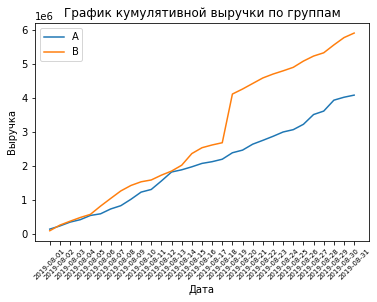

In [18]:
#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group'] == 'A'][['date', 'revenue', 'orders']]

#датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

#строим график выручки группы А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')

#строим график выручки группы B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45, size=7)
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.legend();

**Выводы по п.2.2.:**

    По обеим группам выручка практически равномерно увеличивается в течение всего теста. Однако следует отметить, что по группе В выручка выше в течение всего теста, и примерно 18 августа 2019 года резко увеличивается с дальнейшим равномерным повышением.Вероятно, либо число заказов резко выросло (может быть результатом рекламных мероприятий), либо стали продаваться более дорогие товары (может быть, в продажу поступил новый товар, более дорогой по цене, чем были до этого, и он стал пользоваться спросом среди покупателей).

### График кумулятивного среднего чека по группам

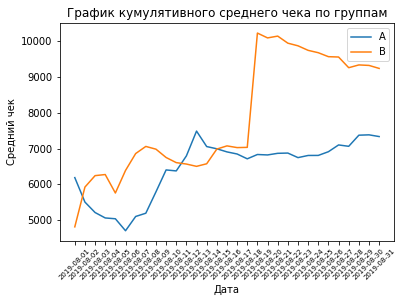

In [19]:
#строим графики среднего чека по группе А
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')

#строим графики среднего чека по группе B
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45, size=7)
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.legend();


**Выводы по п.2.3.:**

Средний чек по обеим группам примерно опять же до 12-18 августа скачкообразно меняется, то резко падает, то резко растет. Но после 18 августа изменения становятся более равномерными:  по группе А он устанавливается примерно на одном уровне (около 7000), по группе В стабильно падает. Вероятно, скачки в первой половине теста связаны с крупными заказами.

### График относительного изменения кумулятивного среднего чека группы B к группе A

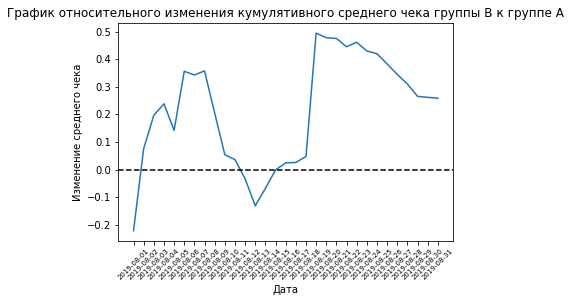

In [20]:
#собираем данные в одном датафрейме
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график относительного изменения кумулятивного среднего чека группы B к группе А
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)

#добавляем ось Х
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45, size=7)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel('Изменение среднего чека')
plt.xlabel('Дата');

**Выводы по п.2.4.:**

В нескольких точках график различия между сегментами резко скачет. Вероятно, это связано с выбросами и крупными заказами.   
    

### График кумулятивного среднего количества заказов на посетителя по группам

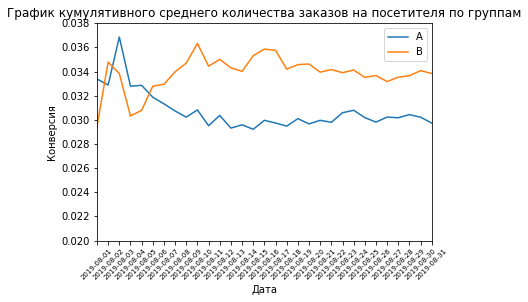

In [21]:
#считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

#отделяем данные по группе А
cummulativeDataA = cummulativeData[cummulativeData['group'] == 'A']

#отделяем данные по группе В
cummulativeDataB = cummulativeData[cummulativeData['group'] == 'B']

#строим графики
plt.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
plt.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
plt.xticks(rotation=45, size=7)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Конверсия')
plt.xlabel('Дата')
plt.legend()

#задаем масштаб осей
plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.038]);


**Выводы по п.2.5.:**

В начале теста конверсия по обеим группам очень сильно скачкообразно колебались, но ближе к середине теста и до конца тестового периода конверсии по обеим группам зафиксировались. Но при этом в группе В конверсия выросла и зафиксировалась, а группа А сильно просела в конверсии и также зафиксировалась.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A 

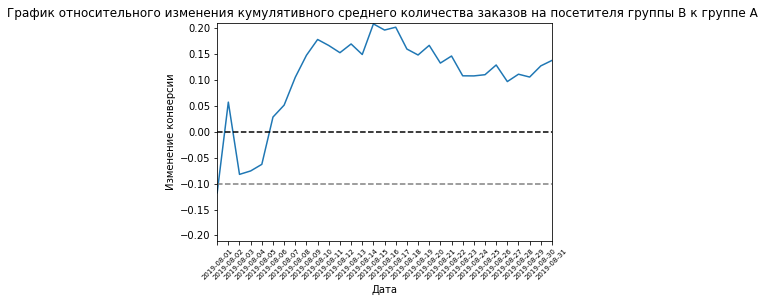

In [22]:
#собираем данные в одном датафрейме
mergedCumulativeConversions = cummulativeDataA[['date', 'conversion']].merge(cummulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

#строим график относительного изменения кумулятивного среднего количества заказов  на посетителя группы В к группе А
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.xticks(rotation=45, size=7)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.21, 0.21])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A ')
plt.ylabel('Изменение конверсии')
plt.xlabel('Дата');


**Выводы по п.2.6.:**

В начале теста группа В проигрывала группе А, но затем вырвалась вперед - сначала сильно росла, затем стала немного снижаться, в конце теста опять тенденция к росту. В целом, можно сказать, что группа В значительно выигрывает в конверсии по сравнению с группой А.

### Точечный график количества заказов по пользователям

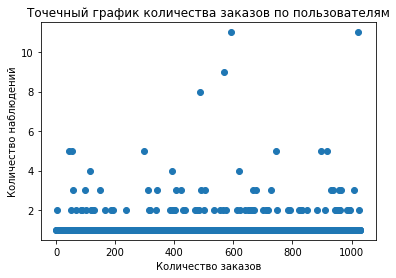

In [23]:
#cчитаем количество заказов по посетителям
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId' : 'nunique'})
ordersByUsers.columns = ['UserId', 'orders']
#серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
#строим точечный график количества заказов по пользователям
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество наблюдений')
plt.xlabel('Количество заказов');

**Выводы по п.2.7.:**

Основная часть пользователей делает один заказ. Но точечный график показывает также достаточно большое количество пользователей с 2-3 заказами.

### Расчет 95-й и 99-й перцентили количества заказов на пользователей

In [24]:
#считаем 95 и 99 перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95,99]))

[2. 4.]


**Выводы по п.2.8.:**

Не более 5% пользователей делают более 2-х заказов, и не более 1% пользователей делают более 4-х заказов. Выберем 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеем аномальных пользователей по ней. Так мы уберем 5% пользователей с наибольшим числом заказов.

### Точечный график стоимостей заказов.

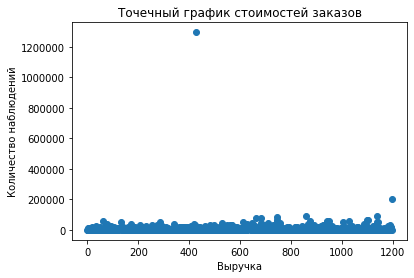

In [25]:
##серия из чисел от 0 до количества наблюдений в столбце revenue в orders
x_value = pd.Series(range(0, len(orders['revenue'])))
#строим точечный график стоимостей заказов
plt.ticklabel_format(style='plain')
plt.scatter(x_value, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Количество наблюдений')
plt.xlabel('Выручка');

**Выводы по п.2.9.:**

По графику предположительная граница аномальных заказов не выше 80000 руб.

### Расчет 95-й и 99-й перцентили стоимости заказов.

In [26]:
#считаем 95 и 99 перцентили  стоимости заказов
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


**Выводы по п.2.10.:**

Не более 5% заказов дороже 28000 руб., и не более 1% заказов дороже 58233,2 руб. Возьмем за границу определения аномальных заказов стоимость заказа 30000 руб. Так мы уберем от 1% до 5% пользователей с дорогими заказами.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

In [27]:
#подготовим данные для расчета статистической значимости по "сырым" данным
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [28]:
#считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p_value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительное различие между группами:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
 

p_value: 0.017
Относительное различие между группами: 0.138


**Выводы по п.2.11.:**

Перед расчетом выдвинем гипотезы. Нулевая: различий в среднем количестве заказов на посетителя между группами нет. Альтернативная: различия между группами есть.

В результате расчета получили p_value=0.017, то есть меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. И следует также отметить, что относительный выигрыш группы В равен 13.8%. 

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

In [29]:
#считаем статистическую значимость различий в среднем чеке заказа между группами  по "сырым" данным
print('p_value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))
print('Относительное различие между группами:', '{0:.3f}'.format(orders[orders['group'] == 'A']['revenue'].mean()/orders[orders['group'] == 'B']['revenue'].mean()-1))

p_value: 0.729
Относительное различие между группами: -0.206


**Выводы по п.2.12.:**

Перед расчетом выдвинули гипотезы. Нулевая: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

В результате расчета получили, что p_value=0.729, то есть значительно выше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Наблюдаемое различие среднего чека группы В по отношению к среднему чеку группы А (20.6%) не является статистически значимым.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [30]:
#узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
68


In [31]:
#подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [32]:
#считаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.013
0.172


**Выводы по п.2.13.:**

Всего получилось 68 аномальных пользователей.

По "очищенным" данным результаты p_value по среднему количеству заказов практически не изменилось. Значит, в результате анализа "очищенных" данных, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, также отвергаем . Кроме того, относительный выигрыш группы В стал еще выше - 17.2% (если сравнивать, с анализом "сырых" данных), что подтверждает статистическую значимость наблюдения.

###  Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [33]:
#считаем статистическую значимость различий в среднем чеке заказа между группами  по "очищенным" данным
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.720
-0.023


**Выводы по п.2.14.:**

По "очищенным" данным p_value по среднему чеку заказа изменился, но не очень сильно. Значит по "очищенным" данным также нет причин отвергать нулевую гипотезу. По "очищенным" данным различие в среднем чеке в 2.3% не является статистически значимым.

**Общие выводы по п.2**

- По среднему количеству заказов существует статистически значимое различие между группами как по "сырым" данным, так и по  данным после фильтрации аномалий.

- По среднему чеку нет статистически значимого различия между группами ни по "сырым" данным, ни по данным после фильтрации аномалий.

- График различия среднего количества заказов показывает, что результаты группы В значительно лучше результатов по группе А и тенденция роста в целом сохраняется.

- График различия среднего чека показывает, что группа В побеждает группу А по этому показателю, но статистически значимой разницы по среднему чеку нет (чек не вырос, но и не стал ниже, чем в группе А). 

### Решение по результатам А/В-теста

Исходя из обнаруженных фактов, следует остановить тест, признать его успешным и зафиксировать победу группы В, так как среднее количество заказов по этой группе выросло, а средний чек остался неизменным, что в результате приведет к увеличению выручки по этой группе. Однако, следует помнить о том, что результаты этого теста не являются абсолютно достоверными, так как существуют пользователи, которые присутствуют в обеих группах. В идеале нужно было бы перед проведением теста сообщить об обнаружении этих пользователей в подразделение, которое составляло эти выборки, с целью устранения ошибки.